<IPython.core.display.Javascript object>


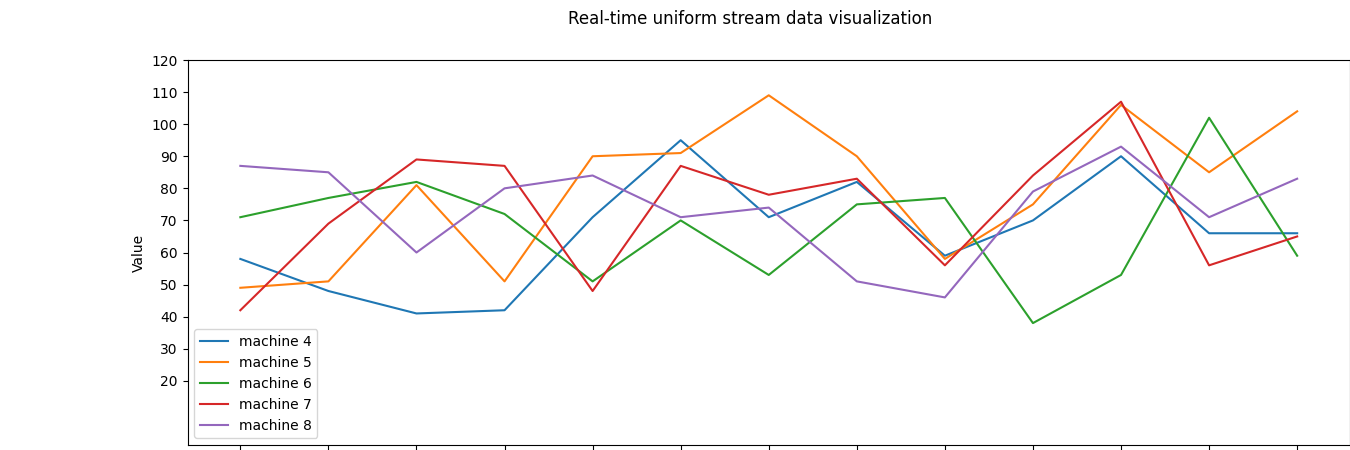

KeyboardInterrupt: 

In [5]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
import json
import time

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Streaming_Linux_memory'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=200000,
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 15
        height = 5
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
            
def consume_messages(consumer,fig, ax):
    try:
        # container for x and y values
        machine_4,machine_5,machine_6,machine_7,machine_8, x = [], [] , [], [], [], []
        
        for message in consumer:   
            data = json.loads(message.value)
            count_4,count_5,count_6,count_7,count_8 = 0,0,0,0,0
            for i in data:
                ts = time.strftime("%H:%M:%S",time.localtime(i['ts'] ))
                if ts not in x:
                    x.append(ts)
                
                if i['machine'] == '4':
                    count_4 +=1
                elif i['machine'] == '5':
                    count_5 +=1
                elif i['machine'] == '6':
                    count_6 +=1
                elif i['machine'] == '7':
                    count_7 +=1
                elif i['machine'] == '8':
                    count_8 +=1
            machine_4.append(count_4)
            machine_5.append(count_5)
            machine_6.append(count_6)
            machine_7.append(count_7)
            machine_8.append(count_8)
            if len(machine_4) >12:
                ax.clear()
                if len(x)>len(machine_4):
                    for a in range(len(x) - len(machine_4)):
                        x.pop(-1)
                ax.plot(x, machine_4,label='machine 4')
                ax.plot(x, machine_5,label='machine 5')
                ax.plot(x, machine_6,label='machine 6')
                ax.plot(x, machine_7,label='machine 7')
                ax.plot(x, machine_8,label='machine 8')
                ax.set_xlabel('Time')
                ax.set_ylabel('Value')
                ax.set_ylim(0,120) 
                ax.set_yticks([20,30,40,50,60,70,80,90,100,110,120])
                ax.legend()
                fig.canvas.draw()
                x.pop(0)
                machine_4.pop(0)
                machine_5.pop(0)
                machine_6.pop(0)
                machine_7.pop(0)
                machine_8.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer,fig, ax)  

In [31]:
!pip uninstall matplotlib --yes

In [32]:
!pip install matplotlib

  Using cached matplotlib-3.3.2-cp38-cp38-manylinux1_x86_64.whl (11.6 MB)
